In [3]:
import json, urllib, numpy as np, matplotlib.pylab as plt, matplotlib.ticker as mtick, requests
import sunpy.map
import drms
from astropy.io import fits
from sunpy.cm import color_tables as ct
import sunpy.wcs as wcs
from datetime import datetime as dt_obj
import matplotlib.dates as mdates
import matplotlib.colors as mcol
import matplotlib.patches as ptc
from matplotlib.dates import *
import math

In [4]:
import drms
c = drms.Client()


In [10]:
keys_aia, segments = c.query('aia.lev1[2013.11.08_04:26:00_TAI/12s][?WAVELNTH=1600?]', key='T_REC,CROTA2,CDELT1,CDELT2,CRPIX1,CRPIX2,CRVAL1,CRVAL2', seg='image_lev1')
url_aia = 'http://jsoc.stanford.edu' + segments.image_lev1[0]   # add the jsoc.stanford.edu suffix to the segment name
chromosphere_image = fits.open(url_aia       )  

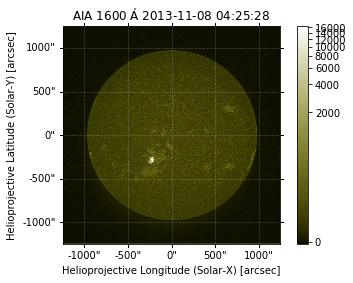

In [12]:
sunpy.map.Map(url_aia).peek()
plt.show()

In [13]:
keys_hmi, segments = c.query('hmi.M_720s[2013.11.08_04:26:00_TAI]', key=drms.const.all, seg='magnetogram')
url_hmi = 'http://jsoc.stanford.edu' + segments.magnetogram[0]   # add the jsoc.stanford.edu suffix to the segment name
photosphere_full_image = fits.getdata(url_hmi)  

In [14]:
header = dict(keys_hmi.iloc[0])

In [15]:
# Add a DATE-OBS keyword which seems to be required by sunpy.map.Map.
header['DATE-OBS'] = keys_hmi.DATE__OBS[0]

# Add HGLN_OBS keyword to avoid a warning in sunpy.map.Map.
header['HGLN_OBS'] = 0.0

/Users/willintoncaicedo/opt/anaconda3/lib/python3.7/site-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  r = frame.represent_as(UnitSphericalRepresentation)


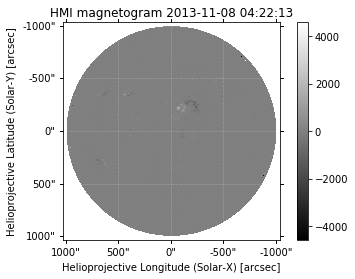

In [16]:
sunpy.map.Map(photosphere_full_image, header).peek()
plt.show()

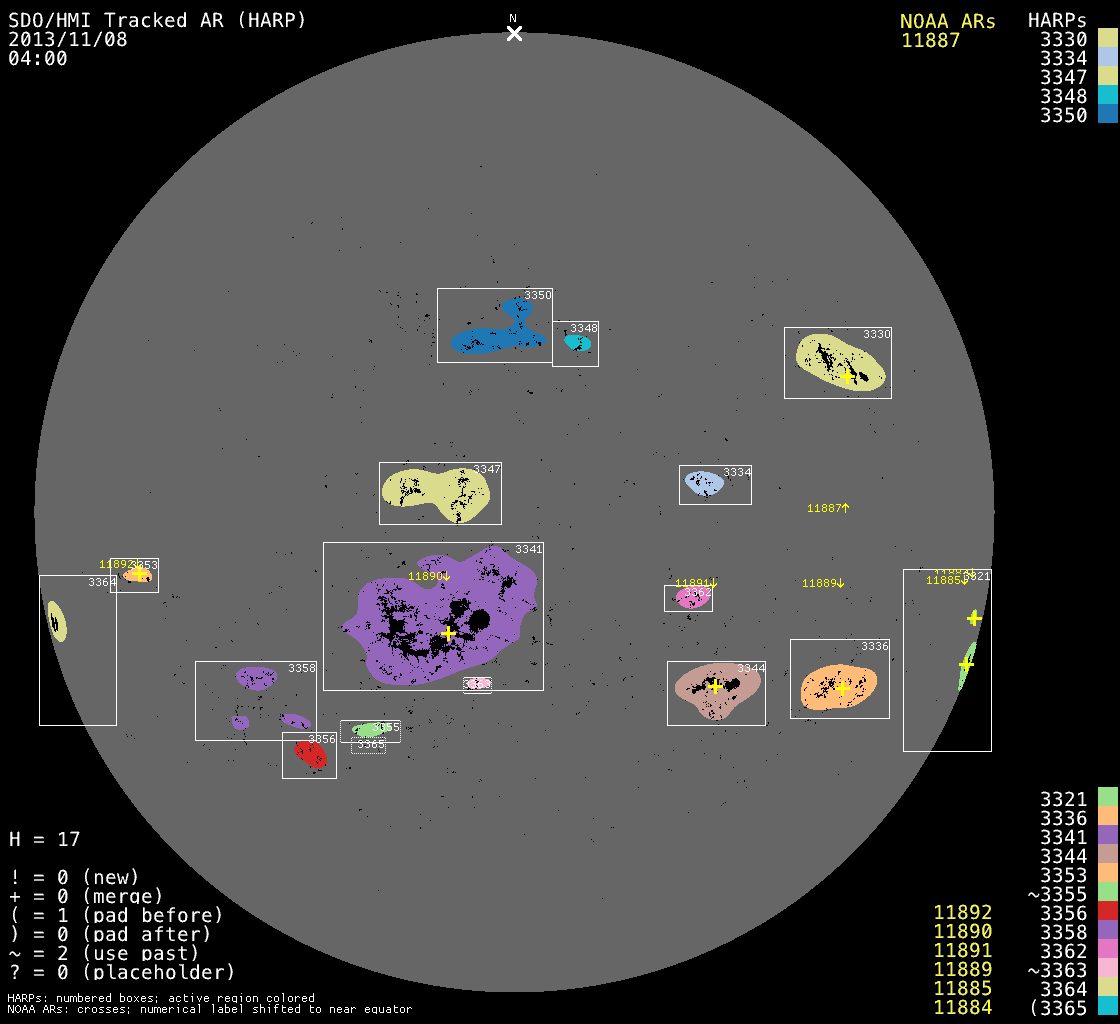

In [26]:
from IPython.display import Image
Image("http://jsoc.stanford.edu/doc/data/hmi/harp/harp_definitive/2013/11/08/harp.2013.11.08_04:00:00_TAI.png")

In [27]:
keys_ccd, segments = c.query('hmi.sharp_720s[3341][2013.11.08_04:26:00_TAI]', key=drms.const.all, seg='magnetogram')
url_ccd = 'http://jsoc.stanford.edu' + segments.magnetogram[0]   # add the jsoc.stanford.edu suffix to the segment name
photosphere_image = fits.open(url_ccd)                           # download the data
XDIM_CCD = photosphere_image[1].data.shape[1]
YDIM_CCD = photosphere_image[1].data.shape[0]

In [28]:
if (keys_ccd.CROTA2[0] > 5.0):
    print("The HMI camera rotation angle is",keys_ccd.CROTA2[0],". Rotating HMI images.")
    photosphere_full_image = np.rot90(photosphere_full_image,2)
    photosphere_image[1].data = np.rot90(photosphere_image[1].data,2)

The HMI camera rotation angle is 180.01358000000002 . Rotating HMI images.


The dimensions of this image are 594 by 883 .


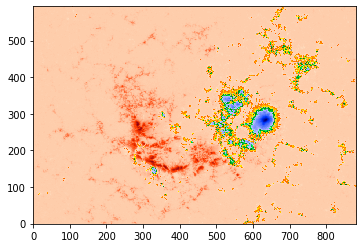

In [29]:
hmimag = plt.get_cmap('hmimag')
plt.imshow(photosphere_image[1].data,cmap=hmimag,origin='lower')
print('The dimensions of this image are',photosphere_image[1].data.shape[0],'by',photosphere_image[1].data.shape[1],'.')

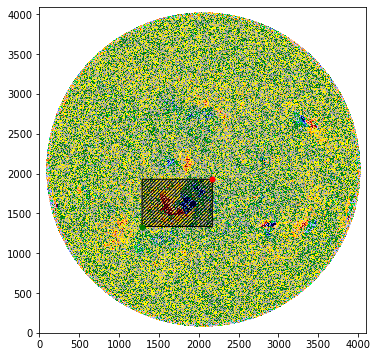

In [30]:
fig, ax = plt.subplots(1,1)
plt.imshow(photosphere_full_image,cmap=hmimag,origin='lower',vmax=300,vmin=-300,extent=[0,4096,0,4096])
y1 = (2048. + keys_ccd.CRPIX2[0] - YDIM_CCD)  
y2 = (2048. + keys_ccd.CRPIX2[0])
x1 = (2048. + keys_ccd.CRPIX1[0] - XDIM_CCD)
x2 = (2048. + keys_ccd.CRPIX1[0])

# draw a box using matplotlib.patches.Rectangle
ax.add_patch(ptc.Rectangle((x1, y1), XDIM_CCD, YDIM_CCD, hatch='///////', fill=False, snap=False))

# plot a green dot at the lower left-hand corner
plt.plot(x1, y1, 'g.', markersize=10.0)

# plot a red dot at the upper right-hand corner
plt.plot(x2, y2, 'r.', markersize=10.0)
fig.set_size_inches(6,6)

In [31]:
ratio = (keys_ccd.CDELT1[0])/(keys_aia.CDELT1[0])
print("The ratio of the HMI:AIA platescales is",ratio,".")

The ratio of the HMI:AIA platescales is 0.827644152267987 .


In [32]:
chromosphere_image.verify("fix")
if (keys_aia.CROTA2[0] > 5.0):
    print("The AIA camera rotation angle is",keys_aia.CROTA2[0],". Rotating AIA image.")
    chromosphere_image[1].data = np.rot90(chromosphere_image[1].data,2)

 [astropy.io.fits.verify]


In [33]:
y1 = int(np.rint(2048. + keys_ccd.CRPIX2[0]*(ratio) - YDIM_CCD*(ratio)))
y2 = int(np.rint(2048. + keys_ccd.CRPIX2[0]*(ratio)))
x1 = int(np.rint(2048. + keys_ccd.CRPIX1[0]*(ratio) - XDIM_CCD*(ratio)))
x2 = int(np.rint(2048. + keys_ccd.CRPIX1[0]*(ratio)))

In [34]:
subdata = chromosphere_image[1].data[y1:y2, x1:x2]

The dimensions of this image are 492 by 731 .


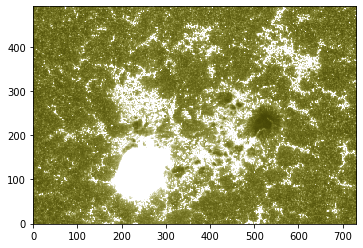

In [35]:
sdoaia1600 = plt.get_cmap('sdoaia1600')
plt.imshow(subdata,cmap=sdoaia1600,origin='lower',vmin=0,vmax=400)
print('The dimensions of this image are',subdata.shape[0],'by',subdata.shape[1],'.')

In [36]:
keys_cea, segments = c.query('hmi.sharp_cea_720s[3341][2013.11.08_04:26:00_TAI]', key=drms.const.all, seg='magnetogram')
url_cea = 'http://jsoc.stanford.edu' + segments.magnetogram[0]   # add the jsoc.stanford.edu suffix to the segment name
cea_image = fits.open(url_cea)                           # download the data
XDIM_CEA = cea_image[1].data.shape[1]
YDIM_CEA = cea_image[1].data.shape[0]

The dimensions of this CEA-projected image are 593 by 893 .


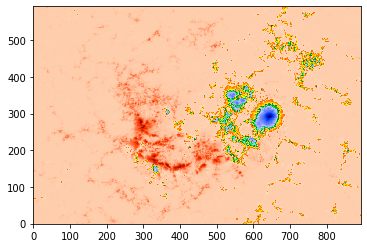

In [37]:
plt.imshow(cea_image[1].data,cmap=hmimag,origin='lower')
print('The dimensions of this CEA-projected image are',cea_image[1].data.shape[0],'by',cea_image[1].data.shape[1],'.') 

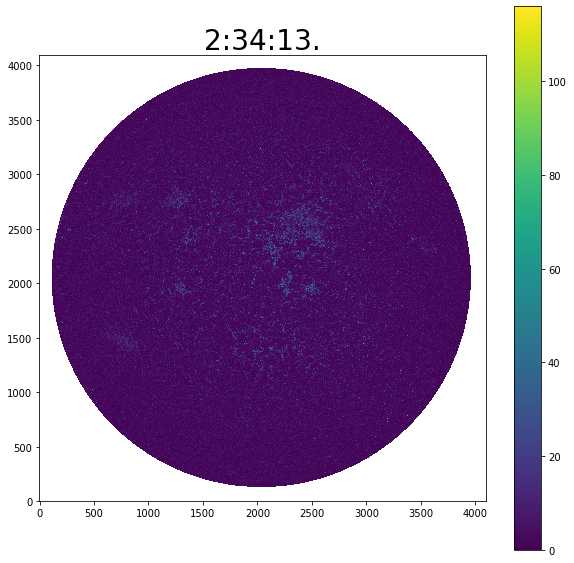

<Figure size 432x288 with 0 Axes>

In [41]:
from sunpy.map import Map
import matplotlib.pyplot as plt
import numpy as np
file1 = 'hmi.b_720s.20131108_023600_TAI.inclination.fits'
file2 = 'hmi.b_720s.20131108_022400_TAI.inclination.fits'
map1 = Map(file1)
map2 = Map(file2)
diff = map2.data - map1.data
fig = plt.figure(figsize=(10,10))
plt.imshow(np.abs(diff),origin='bottom')
plt.colorbar()
plt.title(map1.date.value[12:20],fontsize=28)
plt.show()
plt.savefig('test.pdf',dpi=300)